<a href="https://colab.research.google.com/github/LouisKimDev/MobilityVisionSystem/blob/main/MVS_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 주파수 영역에서의 Low-Pass Filter의 한 종류인 Gaussian Filter를 구현사히오. 아래의 절차대로 하시오.

In [155]:
import numpy as np
import numpy.fft as fp
import cv2
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from google.colab import drive
from google.colab.patches import cv2_imshow
from scipy import signal
from scipy.fftpack import fft, fftshift

<ipython-input-159-506915bdf5d4>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow(G3_img.astype(int), cmap='gray')
<ipython-input-159-506915bdf5d4>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(G5_img.astype(int), cmap='gray')
<ipython-input-159-506915bdf5d4>:41: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(G7_img.astype(int), cmap='gray')
<ipython-input-159-506915bdf5d4>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(G9_img.astype(int), cmap='gray')
<ipython-input-159-506915bdf5d4>:51: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(G11_img.astype(int), cmap='gray')


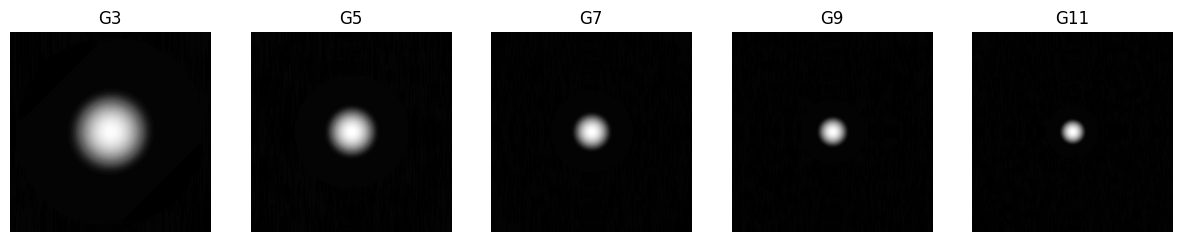

In [159]:
# 1) 가우시안 필터 식에서의 시그마를 3, 5, 7, 9, 11로 변화시키면서 주파수 영역에서 확인하시오.
# 2) 서로 다른 시그마값에 대한 필터 파일명을 각각 G3, G5, G7, G9, G11로 하시오.
def signaltonoise(a, axis=0, ddof=0):
  a = np.asanyarray(a)
  m = a.mean(axis)
  sd = a.std(axis = axis, ddof = ddof)
  return np.where(sd ==0, 0, m/sd)
img = cv2.imread("/content/drive/MyDrive/images/circles.jpg",0)
g3 = np.outer(signal.gaussian(img.shape[0], 3), signal.gaussian(img.shape[1], 3))
g5 = np.outer(signal.gaussian(img.shape[0], 5), signal.gaussian(img.shape[1], 5))
g7 = np.outer(signal.gaussian(img.shape[0], 7), signal.gaussian(img.shape[1], 7))
g9 = np.outer(signal.gaussian(img.shape[0], 9), signal.gaussian(img.shape[1], 9))
g11 = np.outer(signal.gaussian(img.shape[0], 11), signal.gaussian(img.shape[1], 11))

G3 = fp.fft2(fp.ifftshift(g3))
G5 = fp.fft2(fp.ifftshift(g5))
G7 = fp.fft2(fp.ifftshift(g7))
G9 = fp.fft2(fp.ifftshift(g9))
G11 = fp.fft2(fp.ifftshift(g11))

G3_img = 20 * np.log10(0.1 + fp.fftshift(G3))
G5_img = 20 * np.log10(0.1 + fp.fftshift(G5))
G7_img = 20 * np.log10(0.1 + fp.fftshift(G7))
G9_img = 20 * np.log10(0.1 + fp.fftshift(G9))
G11_img = 20 * np.log10(0.1 + fp.fftshift(G11))


pylab.figure(figsize = (15,15))
pylab.subplot(151)
pylab.axis('off')
pylab.imshow(G3_img.astype(int), cmap='gray')
pylab.title('G3')

plt.subplot(152)
plt.axis('off')
plt.imshow(G5_img.astype(int), cmap='gray')
plt.title('G5')

plt.subplot(153)
plt.axis('off')
plt.imshow(G7_img.astype(int), cmap='gray')
plt.title('G7')

plt.subplot(154)
plt.axis('off')
plt.imshow(G9_img.astype(int), cmap='gray')
plt.title('G9')

plt.subplot(155)
plt.axis('off')
plt.imshow(G11_img.astype(int), cmap='gray')
plt.title('G11')
plt.show()

<ipython-input-157-e1449676a6fe>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(X_img.astype(int), cmap='gray')


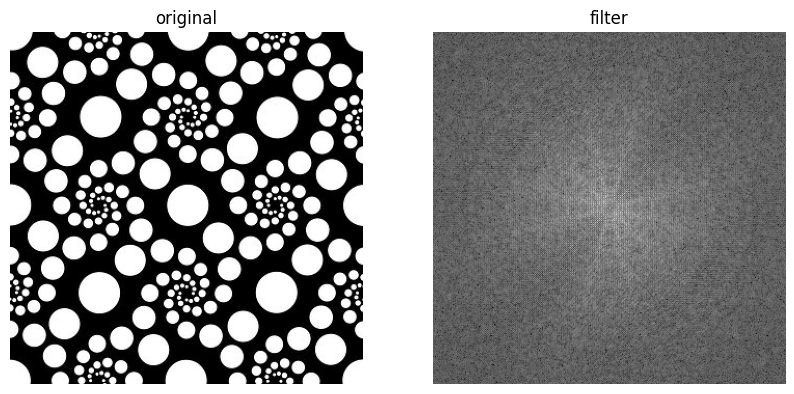

In [157]:
# 3) 이미지 파일(이미지는 본인이 고를 것) x의 푸리에 변환 결과 X를 나타내시오.
x = cv2.imread("/content/drive/MyDrive/images/circles.jpg",0)

X = fp.fft2(img)
X_img = 20* np.log10(0.1+ fp.fftshift(X))

plt.figure(figsize = (10,10))
plt.subplot(121)
plt.axis('off')
plt.imshow(x, cmap='gray')
plt.title('original')
plt.subplot(122)
plt.axis('off')
plt.imshow(X_img.astype(int), cmap='gray')
plt.title('filter')
plt.show()

<ipython-input-161-506f4d1e73c1>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(Y3_img.astype(int), cmap='gray')
<ipython-input-161-506f4d1e73c1>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(Y5_img.astype(int), cmap='gray')
<ipython-input-161-506f4d1e73c1>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(Y7_img.astype(int), cmap='gray')
<ipython-input-161-506f4d1e73c1>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(Y9_img.astype(int), cmap='gray')
<ipython-input-161-506f4d1e73c1>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(Y11_img.astype(int), cmap='gray')


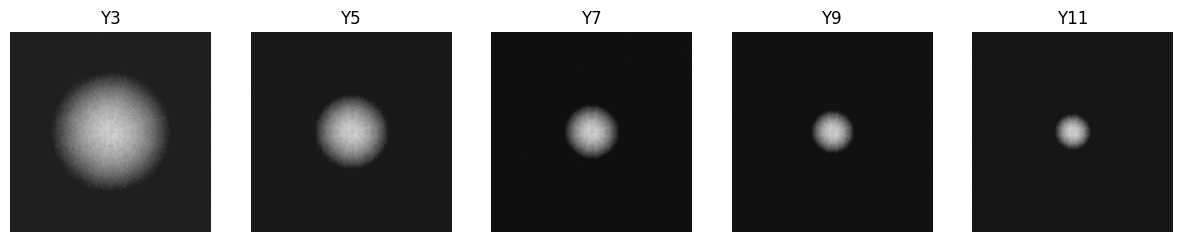

In [161]:
# 4) X와 G3, G5, G7, G9, G11과 각각 곱한 후 그 결과를 확인하시오. 결과의 이름은 각각 Y3, Y5, Y7, Y9, Y11이라 한다.
Y3 = X * G3
Y5 = X * G5
Y7 = X * G7
Y9 = X * G9
Y11 = X * G11

Y3_img = 20* np.log10(0.1 + fp.fftshift(Y3))
Y5_img = 20* np.log10(0.1 + fp.fftshift(Y5))
Y7_img = 20* np.log10(0.1 + fp.fftshift(Y7))
Y9_img = 20* np.log10(0.1 + fp.fftshift(Y9))
Y11_img = 20* np.log10(0.1 + fp.fftshift(Y11))

plt.figure(figsize = (15,15))
plt.subplot(151)
plt.axis('off')
plt.imshow(Y3_img.astype(int), cmap='gray')
plt.title('Y3')

plt.subplot(152)
plt.axis('off')
plt.imshow(Y5_img.astype(int), cmap='gray')
plt.title('Y5')

plt.subplot(153)
plt.axis('off')
plt.imshow(Y7_img.astype(int), cmap='gray')
plt.title('Y7')

plt.subplot(154)
plt.axis('off')
plt.imshow(Y9_img.astype(int), cmap='gray')
plt.title('Y9')

plt.subplot(155)
plt.axis('off')
plt.imshow(Y11_img.astype(int), cmap='gray')
plt.title('Y11')
plt.show()

<ipython-input-168-200493ab415a>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(g3_img.astype(int), cmap='gray')
<ipython-input-168-200493ab415a>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(g5_img.astype(int), cmap='gray')
<ipython-input-168-200493ab415a>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(g7_img.astype(int), cmap='gray')
<ipython-input-168-200493ab415a>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(g7_img.astype(int), cmap='gray')
<ipython-input-168-200493ab415a>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(g11_img.astype(int), cmap='gray')


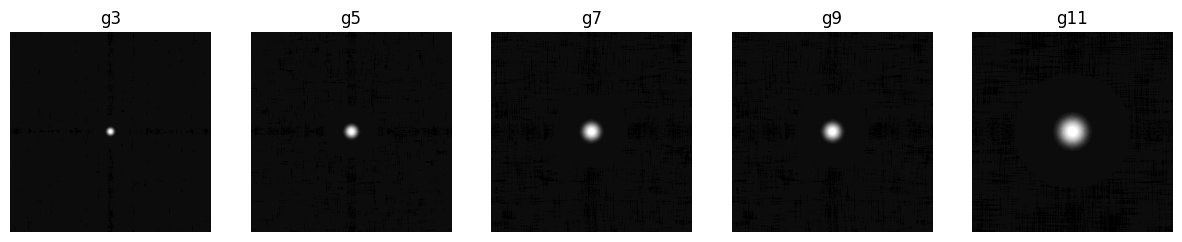

In [168]:
# 4) G3, G5, G7, G9, G11의 역 푸리에 변환 결과를 각각 g3, g5, g7, g9, g11 파일명으로 저장하시오.
g3 = fp.ifft2(G3)
g5 = fp.ifft2(G5)
g7 = fp.ifft2(G7)
g9 = fp.ifft2(G9)
g11 = fp.ifft2(G11)

g3_img = 20* np.log10(0.1 + fp.fftshift(g3))
g5_img = 20* np.log10(0.1 + fp.fftshift(g5))
g7_img = 20* np.log10(0.1 + fp.fftshift(g7))
g9_img = 20* np.log10(0.1 + fp.fftshift(g9))
g11_img = 20* np.log10(0.1 + fp.fftshift(g11))

plt.figure(figsize = (15,15))
plt.subplot(151)
plt.axis('off')
plt.imshow(g3_img.astype(int), cmap='gray')
plt.title('g3')

plt.subplot(152)
plt.axis('off')
plt.imshow(g5_img.astype(int), cmap='gray')
plt.title('g5')

plt.subplot(153)
plt.axis('off')
plt.imshow(g7_img.astype(int), cmap='gray')
plt.title('g7')

plt.subplot(154)
plt.axis('off')
plt.imshow(g7_img.astype(int), cmap='gray')
plt.title('g9')

plt.subplot(155)
plt.axis('off')
plt.imshow(g11_img.astype(int), cmap='gray')
plt.title('g11')
plt.show()

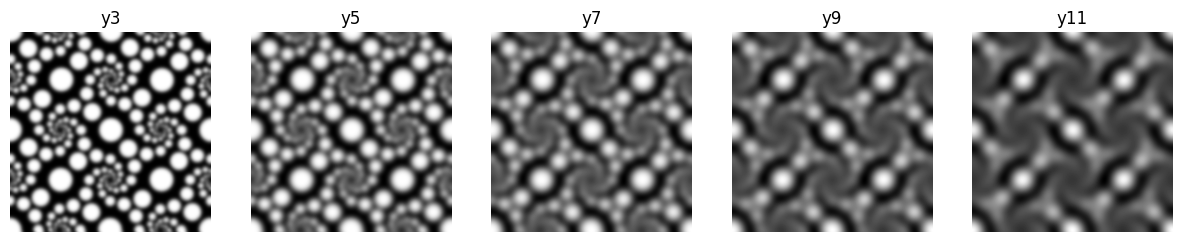

In [170]:
# 5) x와 g3, g5, g7, g9, g11 사이의 컨볼루션 결과를 구현하여 나타시오.
# 이름은 각각 y3, y5, y7, y9, y11이라 한다.
y3 = fp.ifft2(Y3).real
y5 = fp.ifft2(Y5).real
y7 = fp.ifft2(Y7).real
y9 = fp.ifft2(Y9).real
y11 = fp.ifft2(Y11).real

plt.figure(figsize = (15,15))
plt.subplot(151)
plt.axis('off')
plt.imshow(y3, cmap='gray')
plt.title('y3')

plt.subplot(152)
plt.axis('off')
plt.imshow(y5, cmap='gray')
plt.title('y5')

plt.subplot(153)
plt.axis('off')
plt.imshow(y7, cmap='gray')
plt.title('y7')

plt.subplot(154)
plt.axis('off')
plt.imshow(y9, cmap='gray')
plt.title('y9')

plt.subplot(155)
plt.axis('off')
plt.imshow(y11, cmap='gray')
plt.title('y11')
plt.show()


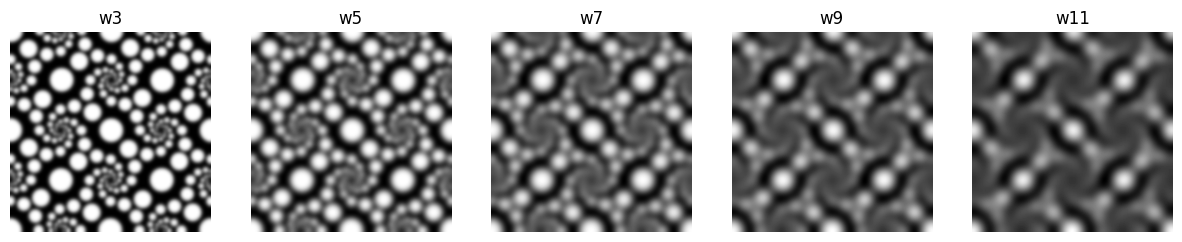

In [174]:
# 6) OpenCV에서 제공하는 가우시안필터에서 시그마를 3, 5, 7, 9, 11로 변환시켜 나타내시오.
# 각각 w3, w5, w7, w9, w11로 저장하시오.
w3 = cv2.GaussianBlur(x, (0,0), 3)
w5 = cv2.GaussianBlur(x, (0,0), 5)
w7 = cv2.GaussianBlur(x, (0,0), 7)
w9 = cv2.GaussianBlur(x, (0,0), 9)
w11 = cv2.GaussianBlur(x, (0,0), 11)

plt.figure(figsize = (15,15))
plt.subplot(151)
plt.axis('off')
plt.imshow(w3, cmap='gray')
plt.title('w3')

plt.subplot(152)
plt.axis('off')
plt.imshow(w5, cmap='gray')
plt.title('w5')

plt.subplot(153)
plt.axis('off')
plt.imshow(w7, cmap='gray')
plt.title('w7')

plt.subplot(154)
plt.axis('off')
plt.imshow(w9, cmap='gray')
plt.title('w9')

plt.subplot(155)
plt.axis('off')
plt.imshow(w11, cmap='gray')
plt.title('w11')
plt.show()

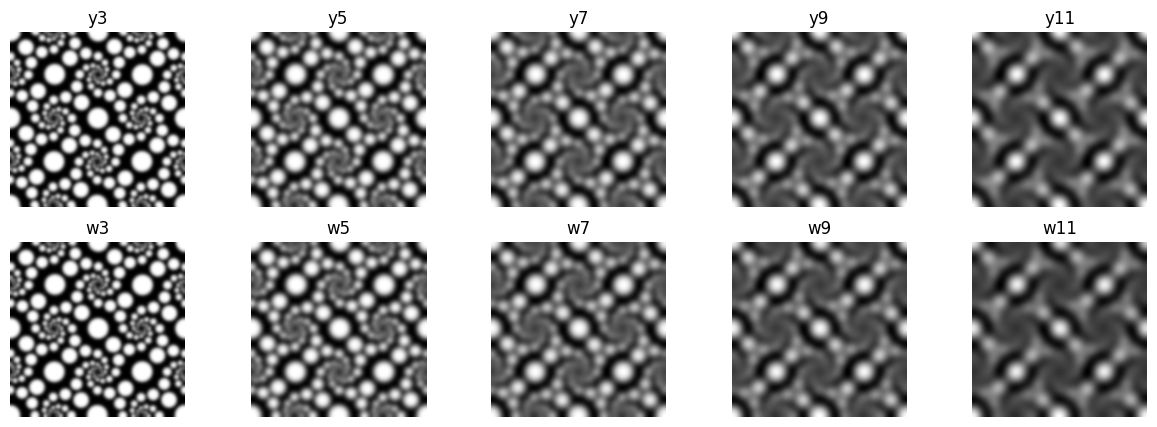

In [177]:
# 7) 5)에서 구한 결과와 6)에서 구한 결과를 비교한 후 분석 결과를 설명하시오.
plt.figure(figsize = (15,5))

plt.subplot(251)
plt.axis('off')
plt.imshow(y3, cmap='gray')
plt.title('y3')

plt.subplot(252)
plt.axis('off')
plt.imshow(y5, cmap='gray')
plt.title('y5')

plt.subplot(253)
plt.axis('off')
plt.imshow(y7, cmap='gray')
plt.title('y7')

plt.subplot(254)
plt.axis('off')
plt.imshow(y9, cmap='gray')
plt.title('y9')

plt.subplot(255)
plt.axis('off')
plt.imshow(y11, cmap='gray')
plt.title('y11')

plt.subplot(256)
plt.axis('off')
plt.imshow(w3, cmap='gray')
plt.title('w3')

plt.subplot(257)
plt.axis('off')
plt.imshow(w5, cmap='gray')
plt.title('w5')

plt.subplot(258)
plt.axis('off')
plt.imshow(w7, cmap='gray')
plt.title('w7')

plt.subplot(259)
plt.axis('off')
plt.imshow(w9, cmap='gray')
plt.title('w9')

plt.subplot(2,5,10)
plt.axis('off')
plt.imshow(w11, cmap='gray')
plt.title('w11')
plt.show()
